In [208]:
# DATA2001 Week 9 Tutorial
# Material last updated: 26 Apr 2023
# Note: this notebook was designed with the Roboto Condensed font, which can be installed here: https://www.1001fonts.com/roboto-condensed-font.html

from IPython.display import HTML
HTML('''
    <style> body {font-family: "Roboto Condensed Light", "Roboto Condensed";} h2 {padding: 10px 12px; background-color: #E64626; position: static; color: #ffffff; font-size: 40px;} .text_cell_render p { font-size: 15px; } .text_cell_render h1 { font-size: 30px; } h1 {padding: 10px 12px; background-color: #E64626; color: #ffffff; font-size: 40px;} .text_cell_render h3 { padding: 10px 12px; background-color: #0148A4; position: static; color: #ffffff; font-size: 20px;} h4:before{ 
    content: "@"; font-family:"Wingdings"; font-style:regular; margin-right: 4px;} .text_cell_render h4 {padding: 8px; font-family: "Roboto Condensed Light"; position: static; font-style: italic; background-color: #FFB800; color: #ffffff; font-size: 18px; text-align: center; border-radius: 5px;}input[type=submit] {background-color: #E64626; border: solid; border-color: #734036; color: white; padding: 8px 16px; text-decoration: none; margin: 4px 2px; cursor: pointer; border-radius: 20px;}</style>
''')

In [209]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon
from geoalchemy2 import Geometry, WKTElement
import matplotlib.pyplot as plt

In [210]:
regions = gpd.read_file('SA2/SA2_2021_AUST_GDA2020.shp')
business = pd.read_csv('Businesses.csv')
stops = pd.read_csv('Stops.txt')
polling_places = pd.read_csv('PollingPlaces2019.csv')
primary = gpd.read_file('catchments/catchments_primary.shp')
secondary = gpd.read_file('catchments/catchments_secondary.shp')
future = gpd.read_file('catchments/catchments_future.shp')
population = pd.read_csv('Population.csv')
income = pd.read_csv('Income.csv')

In [211]:
business.describe()

,sa2_code,0_to_50k_businesses,50k_to_200k_businesses,200k_to_2m_businesses,2m_to_5m_businesses,5m_to_10m_businesses,10m_or_more_businesses,total_businesses
count,1.221700e+04,12217.000000,12217.000000,12217.000000,12217.000000,12217.000000,12217.000000,12217.000000
mean,1.149587e+08,18.822870,22.797659,23.555947,2.980110,1.089711,1.282639,70.540313
std,8.810935e+06,51.385349,43.099939,60.411508,14.196956,6.613522,15.953875,175.595935
min,1.010210e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.080112e+08,3.000000,3.000000,3.000000,0.000000,0.000000,0.000000,8.000000
50%,1.160113e+08,8.000000,10.000000,10.000000,0.000000,0.000000,0.000000,33.000000
75%,1.220214e+08,20.000000,26.000000,26.000000,3.000000,0.000000,0.000000,80.000000
max,1.999995e+08,3589.000000,1680.000000,3782.000000,811.000000,458.000000,1504.000000,10125.000000


In [212]:
business.head(10)

,industry_code,industry_name,sa2_code,sa2_name,0_to_50k_businesses,50k_to_200k_businesses,200k_to_2m_businesses,2m_to_5m_businesses,5m_to_10m_businesses,10m_or_more_businesses,total_businesses
0,A,"Agriculture, Forestry and Fishing",101021007,Braidwood,136,92,63,4,0,0,296
1,A,"Agriculture, Forestry and Fishing",101021008,Karabar,6,3,0,0,0,0,9
2,A,"Agriculture, Forestry and Fishing",101021009,Queanbeyan,6,4,3,0,0,3,15
3,A,"Agriculture, Forestry and Fishing",101021010,Queanbeyan - East,0,3,0,0,0,0,3
4,A,"Agriculture, Forestry and Fishing",101021012,Queanbeyan West - Jerrabomberra,7,4,5,0,0,0,16
5,A,"Agriculture, Forestry and Fishing",101021610,Googong,0,3,0,0,0,0,3
6,A,"Agriculture, Forestry and Fishing",101021611,Queanbeyan Surrounds,182,80,60,5,0,0,327
7,A,"Agriculture, Forestry and Fishing",101031013,Bombala,65,92,81,6,0,0,246
8,A,"Agriculture, Forestry and Fishing",101031014,Cooma,28,30,36,3,0,3,96
9,A,"Agriculture, Forestry and Fishing",101031015,Cooma Surrounds,91,84,73,0,0,0,251


In [213]:
print("Shape of the data:", business.shape)

Shape of the data: (12217, 11)


In [214]:
business.isnull().values.any()

False

No null values

In [215]:
print(business.groupby('industry_code').size())

industry_code
A    643
B    643
C    643
D    643
E    643
F    643
G    643
H    643
I    643
J    643
K    643
L    643
M    643
N    643
O    643
P    643
Q    643
R    643
S    643
dtype: int64


As we can see we have equal number of each category in our dataset

In [216]:
business.dtypes

industry_code             object
industry_name             object
sa2_code                   int64
sa2_name                  object
0_to_50k_businesses        int64
50k_to_200k_businesses     int64
200k_to_2m_businesses      int64
2m_to_5m_businesses        int64
5m_to_10m_businesses       int64
10m_or_more_businesses     int64
total_businesses           int64
dtype: object

In [217]:
business = business.astype({'industry_code': 'string', 'industry_name' : 'string', 'sa2_name' : 'string'})
business.dtypes

industry_code             string
industry_name             string
sa2_code                   int64
sa2_name                  string
0_to_50k_businesses        int64
50k_to_200k_businesses     int64
200k_to_2m_businesses      int64
2m_to_5m_businesses        int64
5m_to_10m_businesses       int64
10m_or_more_businesses     int64
total_businesses           int64
dtype: object

In [218]:
business.isna().sum()

industry_code             0
industry_name             0
sa2_code                  0
sa2_name                  0
0_to_50k_businesses       0
50k_to_200k_businesses    0
200k_to_2m_businesses     0
2m_to_5m_businesses       0
5m_to_10m_businesses      0
10m_or_more_businesses    0
total_businesses          0
dtype: int64

In [219]:
income.head()

,sa2_code,sa2_name,earners,median_age,median_income,mean_income
0,101021007,Braidwood,2426,50,44246,61745
1,101021008,Karabar,5128,42,62946,67345
2,101021009,Queanbeyan,6778,39,61724,67276
3,101021010,Queanbeyan - East,3360,40,64010,71770
4,101021011,Queanbeyan Region,13502,44,74042,85303


In [220]:
income.dtypes

sa2_code          int64
sa2_name         object
earners          object
median_age       object
median_income    object
mean_income      object
dtype: object

In [221]:
numeric_columns = ['median_age', 'median_income', 'mean_income', 'earners']

In [222]:
for numeric_column in numeric_columns:
    try:   
        income= income.astype({numeric_column: 'float64'})
    except ValueError:
        print("Could not convert column", numeric_column)

Could not convert column median_age
Could not convert column median_income
Could not convert column mean_income
Could not convert column earners


In [223]:
for numeric_column in numeric_columns:
    income[numeric_column] = pd.to_numeric(income[numeric_column], errors='coerce')

income.isna().sum()

sa2_code         0
sa2_name         0
earners          6
median_age       6
median_income    6
mean_income      6
dtype: int64

In [224]:
for numeric_column in numeric_columns:
    try:   
        income= income.astype({numeric_column: 'float64'})
    except ValueError:
        print("Could not convert column", numeric_column)

In [225]:
income = income.dropna()
income.isna().sum()

sa2_code         0
sa2_name         0
earners          0
median_age       0
median_income    0
mean_income      0
dtype: int64

In [226]:
income.dtypes

sa2_code           int64
sa2_name          object
earners          float64
median_age       float64
median_income    float64
mean_income      float64
dtype: object

In [227]:
income = income.astype({'sa2_name' : 'string'})
income.dtypes

sa2_code           int64
sa2_name          string
earners          float64
median_age       float64
median_income    float64
mean_income      float64
dtype: object

In [228]:
population.head()

,sa2_code,sa2_name,0-4_people,5-9_people,10-14_people,15-19_people,20-24_people,25-29_people,30-34_people,35-39_people,...,45-49_people,50-54_people,55-59_people,60-64_people,65-69_people,70-74_people,75-79_people,80-84_people,85-and-over_people,total_people
0,102011028,Avoca Beach - Copacabana,424,522,623,552,386,222,306,416,...,572,602,570,520,464,369,226,142,70,7530
1,102011029,Box Head - MacMasters Beach,511,666,702,592,461,347,420,535,...,749,749,794,895,863,925,603,331,264,11052
2,102011030,Calga - Kulnura,200,225,258,278,274,227,214,286,...,325,436,422,397,327,264,190,100,75,4748
3,102011031,Erina - Green Point,683,804,880,838,661,502,587,757,...,859,882,901,930,917,1065,976,773,1028,14803
4,102011032,Gosford - Springfield,1164,1044,1084,1072,1499,1864,1750,1520,...,1330,1241,1377,1285,1166,949,664,476,537,21346


In [229]:
population.dtypes

sa2_code               int64
sa2_name              object
0-4_people             int64
5-9_people             int64
10-14_people           int64
15-19_people           int64
20-24_people           int64
25-29_people           int64
30-34_people           int64
35-39_people           int64
40-44_people           int64
45-49_people           int64
50-54_people           int64
55-59_people           int64
60-64_people           int64
65-69_people           int64
70-74_people           int64
75-79_people           int64
80-84_people           int64
85-and-over_people     int64
total_people           int64
dtype: object

In [230]:
population.isna().sum()

sa2_code              0
sa2_name              0
0-4_people            0
5-9_people            0
10-14_people          0
15-19_people          0
20-24_people          0
25-29_people          0
30-34_people          0
35-39_people          0
40-44_people          0
45-49_people          0
50-54_people          0
55-59_people          0
60-64_people          0
65-69_people          0
70-74_people          0
75-79_people          0
80-84_people          0
85-and-over_people    0
total_people          0
dtype: int64

In [231]:
population = population.astype({'sa2_name' : 'string'})

In [232]:
population.dtypes

sa2_code               int64
sa2_name              string
0-4_people             int64
5-9_people             int64
10-14_people           int64
15-19_people           int64
20-24_people           int64
25-29_people           int64
30-34_people           int64
35-39_people           int64
40-44_people           int64
45-49_people           int64
50-54_people           int64
55-59_people           int64
60-64_people           int64
65-69_people           int64
70-74_people           int64
75-79_people           int64
80-84_people           int64
85-and-over_people     int64
total_people           int64
dtype: object

In [233]:
population.describe()

,sa2_code,0-4_people,5-9_people,10-14_people,15-19_people,20-24_people,25-29_people,30-34_people,35-39_people,40-44_people,45-49_people,50-54_people,55-59_people,60-64_people,65-69_people,70-74_people,75-79_people,80-84_people,85-and-over_people,total_people
count,3.730000e+02,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,1.198861e+08,854.737265,890.718499,873.538874,797.010724,941.506702,1079.378016,1141.667560,1119.305630,974.163539,926.337802,860.184987,814.281501,734.670241,618.152815,541.369973,386.790885,268.656836,278.772118,14101.243968
std,6.504069e+06,457.650405,472.605070,465.615660,413.433206,513.399976,711.167860,719.999852,589.994822,453.460847,421.014390,395.336077,376.967453,352.993590,304.425028,281.331172,217.164521,159.342399,204.291009,6039.862248
min,1.020110e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.170316e+08,524.000000,544.000000,517.000000,485.000000,595.000000,578.000000,636.000000,719.000000,679.000000,645.000000,587.000000,559.000000,492.000000,410.000000,355.000000,237.000000,158.000000,122.000000,10291.000000
50%,1.210117e+08,819.000000,854.000000,861.000000,763.000000,891.000000,984.000000,1047.000000,1101.000000,960.000000,931.000000,845.000000,809.000000,703.000000,589.000000,517.000000,366.000000,260.000000,249.000000,13881.000000
75%,1.250116e+08,1157.000000,1207.000000,1182.000000,1065.000000,1219.000000,1462.000000,1506.000000,1496.000000,1314.000000,1227.000000,1138.000000,1072.000000,988.000000,837.000000,734.000000,524.000000,359.000000,403.000000,18757.000000
max,1.280216e+08,2576.000000,2576.000000,2066.000000,1771.000000,3279.000000,4586.000000,4507.000000,3664.000000,2549.000000,1924.000000,1840.000000,1737.000000,1829.000000,1675.000000,1786.000000,1362.000000,891.000000,1110.000000,25565.000000


In [234]:
# for i in range(2,21):
#     print(population.iloc[:,i].sum())
[population.iloc[:,i].sum() for i in range(2,21)]

[318817,
 332238,
 325830,
 297285,
 351182,
 402608,
 425842,
 417501,
 363363,
 345524,
 320849,
 303727,
 274032,
 230571,
 201931,
 144273,
 100209,
 103982,
 5259764]

[318817, 332238, 325830, 297285, 351182, 402608, 425842, 417501, 363363, 345524, 320849, 303727, 274032, 230571, 201931, 144273, 100209, 103982, 5259764]


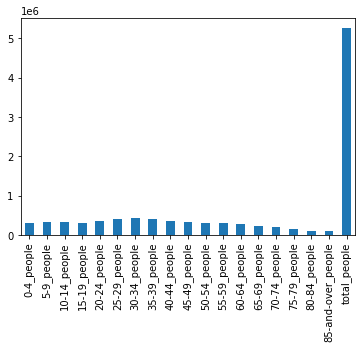

In [235]:
sums = [population.iloc[:,i].sum() for i in range(2,21)]
print(sums)
# Create a histogram of the sums
sums = population.iloc[:,2:21].sum()
sums.plot(kind='bar')
# # Show the plot
plt.show()

### Exploring Pooling Places

In [236]:
polling_places.head()

,FID,state,division_id,division_name,polling_place_id,polling_place_type_id,polling_place_name,premises_name,premises_address_1,premises_address_2,premises_address_3,premises_suburb,premises_state_abbreviation,premises_post_code,latitude,longitude,the_geom
0,aec_federal_election_polling_places_2019.fid-4...,NSW,104,Barton,33595,2,Special Hospital Team 1,Multiple sites,NaN,NaN,NaN,NaN,NSW,NaN,NaN,NaN,NaN
1,aec_federal_election_polling_places_2019.fid-4...,NSW,105,Bennelong,33596,2,Special Hospital Team 1,Multiple sites,NaN,NaN,NaN,NaN,NSW,NaN,NaN,NaN,NaN
2,aec_federal_election_polling_places_2019.fid-4...,NSW,107,Blaxland,33600,2,Special Hospital Team 1,Multiple sites,NaN,NaN,NaN,NaN,NSW,NaN,NaN,NaN,NaN
3,aec_federal_election_polling_places_2019.fid-4...,NSW,109,Calare,33603,2,Special Hospital Team 1,Multiple sites,NaN,NaN,NaN,ORANGE,NSW,2800.0,NaN,NaN,NaN
4,aec_federal_election_polling_places_2019.fid-4...,NSW,113,Cowper,33716,2,Special Hospital Team 2,Multiple sites,NaN,NaN,NaN,NaN,NSW,NaN,NaN,NaN,NaN


In [237]:
polling_places.shape

(2930, 17)

In [238]:
polling_places.isna().sum()

FID                               0
state                             0
division_id                       0
division_name                     0
polling_place_id                  0
polling_place_type_id             0
polling_place_name                0
premises_name                     0
premises_address_1              193
premises_address_2             2816
premises_address_3             2895
premises_suburb                 115
premises_state_abbreviation       0
premises_post_code              109
latitude                        140
longitude                       140
the_geom                        140
dtype: int64

We can see that columns like "premises_address_3" and "premises_address_2" almost fully populated by Nan values. Thus, we can drop them

In [239]:
polling_places = polling_places.drop(labels=['premises_address_3', 'premises_address_2'], axis=1)


In [240]:
polling_places.isna().sum()

FID                              0
state                            0
division_id                      0
division_name                    0
polling_place_id                 0
polling_place_type_id            0
polling_place_name               0
premises_name                    0
premises_address_1             193
premises_suburb                115
premises_state_abbreviation      0
premises_post_code             109
latitude                       140
longitude                      140
the_geom                       140
dtype: int64

In [241]:
n_rows_with_nan = polling_places.isna().any(axis=1).sum()

# Print the result
print(f"Number of rows with at least one NaN value: {n_rows_with_nan}")

Number of rows with at least one NaN value: 207


In [242]:
pd.concat([polling_places.iloc[0,:],polling_places.dtypes,polling_places.isna().sum()],axis=1)

,0,0,1
FID,aec_federal_election_polling_places_2019.fid-4...,object,0
state,NSW,object,0
division_id,104,int64,0
division_name,Barton,object,0
polling_place_id,33595,int64,0
polling_place_type_id,2,int64,0
polling_place_name,Special Hospital Team 1,object,0
premises_name,Multiple sites,object,0
premises_address_1,NaN,object,193
premises_suburb,NaN,object,115


In [243]:
polling_places =  polling_places.astype({'FID' : 'string', 'state' : 'string', 'division_name' : 'string',
                                         'polling_place_name' : 'string', 'premises_name' : 'string'})

In [244]:
pd.concat([polling_places.iloc[0,:],polling_places.dtypes,polling_places.isna().sum()],axis=1,)

,0,0,1
FID,aec_federal_election_polling_places_2019.fid-4...,string,0
state,NSW,string,0
division_id,104,int64,0
division_name,Barton,string,0
polling_place_id,33595,int64,0
polling_place_type_id,2,int64,0
polling_place_name,Special Hospital Team 1,string,0
premises_name,Multiple sites,string,0
premises_address_1,NaN,object,193
premises_suburb,NaN,object,115


In [245]:
len(polling_places[polling_places['the_geom'].isna() & polling_places['premises_address_1'].isna()
               & polling_places['premises_suburb'].isna() & polling_places['premises_post_code'].isna()
               & polling_places['latitude'].isna() & polling_places['longitude'].isna()
               & polling_places['the_geom'].isna()])


109

As we can see we have 109 where all these columns have null values, so we can drop these rows

In [246]:
polling_places = polling_places.dropna(subset=['the_geom', 'premises_address_1', 'premises_suburb', 'premises_post_code', 'latitude', 'longitude'], how='all')
len(polling_places[polling_places['the_geom'].isna() & polling_places['premises_address_1'].isna()
               & polling_places['premises_suburb'].isna() & polling_places['premises_post_code'].isna()
               & polling_places['latitude'].isna() & polling_places['longitude'].isna()
               & polling_places['the_geom'].isna()])

0

In [247]:
pd.concat([polling_places.iloc[0,:],polling_places.dtypes,polling_places.isna().sum()],axis=1,)

,3,0,1
FID,aec_federal_election_polling_places_2019.fid-4...,string,0
state,NSW,string,0
division_id,109,int64,0
division_name,Calare,string,0
polling_place_id,33603,int64,0
polling_place_type_id,2,int64,0
polling_place_name,Special Hospital Team 1,string,0
premises_name,Multiple sites,string,0
premises_address_1,NaN,object,84
premises_suburb,ORANGE,object,6


In [248]:
polling_places.shape

(2821, 15)

We are additionally gonna drop rows where latitude and longitude is null

In [249]:
polling_places = polling_places.dropna(subset=['latitude', 'longitude'], how='all')

In [250]:
pd.concat([polling_places.iloc[0,:],polling_places.dtypes,polling_places.isna().sum()],axis=1,)

,13,0,1
FID,aec_federal_election_polling_places_2019.fid-4...,string,0
state,NSW,string,0
division_id,103,int64,0
division_name,Banks,string,0
polling_place_id,58,int64,0
polling_place_type_id,1,int64,0
polling_place_name,Oatley,string,0
premises_name,Oatley Public School,string,0
premises_address_1,51 Letitia St,object,67
premises_suburb,OATLEY,object,0


In [251]:
polling_places.shape

(2790, 15)

In [252]:
polling_places[polling_places['premises_address_1'].notna()]

,FID,state,division_id,division_name,polling_place_id,polling_place_type_id,polling_place_name,premises_name,premises_address_1,premises_suburb,premises_state_abbreviation,premises_post_code,latitude,longitude,the_geom
13,aec_federal_election_polling_places_2019.fid-4...,NSW,103,Banks,58,1,Oatley,Oatley Public School,51 Letitia St,OATLEY,NSW,2223.0,-33.98470,151.081000,POINT (-33.9847 151.081)
15,aec_federal_election_polling_places_2019.fid-4...,NSW,111,Chifley,392,1,Dharruk,Dawson Public School,7 Stuart Rd,DHARRUK,NSW,2770.0,-33.74750,150.817000,POINT (-33.7475 150.817)
16,aec_federal_election_polling_places_2019.fid-4...,NSW,103,Banks,31,1,Allawah,PJ Ferry Reserve Community Hall,147B Bellevue Pde,ALLAWAH,NSW,2218.0,-33.97679,151.114897,POINT (-33.9767897 151.1148974)
17,aec_federal_election_polling_places_2019.fid-4...,NSW,103,Banks,67,1,Allawah South,St Raphael's Church Hall,84 George St,SOUTH HURSTVILLE,NSW,2221.0,-33.97560,151.111000,POINT (-33.9756 151.111)
18,aec_federal_election_polling_places_2019.fid-4...,NSW,103,Banks,56500,1,Beverly Hills North (Banks),Beverly Hills North Public School,1-3 Shorter Ave,BEVERLY HILLS,NSW,2209.0,-33.94130,151.075000,POINT (-33.9413 151.075)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,aec_federal_election_polling_places_2019.fid-4...,NSW,150,Whitlam,11500,1,Warilla East,Warilla-Barrack Point Surf Life Saving Club,7 Osborne Pde,WARILLA,NSW,2528.0,-34.54950,150.869000,POINT (-34.5495 150.869)
2924,aec_federal_election_polling_places_2019.fid-4...,NSW,150,Whitlam,2810,1,Warilla North,Warilla North Community Centre,2-6 Hill St,WARILLA,NSW,2528.0,-34.54724,150.851770,POINT (-34.54724 150.85177)
2925,aec_federal_election_polling_places_2019.fid-4...,NSW,150,Whitlam,2809,1,Warilla South,Warilla High School,10 Keross Ave,BARRACK HEIGHTS,NSW,2528.0,-34.56420,150.858000,POINT (-34.5642 150.858)
2927,aec_federal_election_polling_places_2019.fid-4...,NSW,150,Whitlam,31242,1,Welby,Welby Community Hall,14 Currockbilly St,WELBY,NSW,2575.0,-34.44090,150.424000,POINT (-34.4409 150.424)


In [253]:
polling_places = polling_places.astype({'premises_address_1' : 'string', 'premises_suburb' : 'string','premises_state_abbreviation' : 'string'})
polling_places.dtypes

FID                             string
state                           string
division_id                      int64
division_name                   string
polling_place_id                 int64
polling_place_type_id            int64
polling_place_name              string
premises_name                   string
premises_address_1              string
premises_suburb                 string
premises_state_abbreviation     string
premises_post_code             float64
latitude                       float64
longitude                      float64
the_geom                        object
dtype: object

In [254]:
from geopandas import GeoDataFrame
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(polling_places.latitude, polling_places.longitude)]
polling_places = polling_places.drop(['latitude','longitude'], axis=1)
polling_places = GeoDataFrame(polling_places, crs="EPSG:4326", geometry=geometry)
polling_places.head()

,FID,state,division_id,division_name,polling_place_id,polling_place_type_id,polling_place_name,premises_name,premises_address_1,premises_suburb,premises_state_abbreviation,premises_post_code,the_geom,geometry
13,aec_federal_election_polling_places_2019.fid-4...,NSW,103,Banks,58,1,Oatley,Oatley Public School,51 Letitia St,OATLEY,NSW,2223.0,POINT (-33.9847 151.081),POINT (-33.98470 151.08100)
15,aec_federal_election_polling_places_2019.fid-4...,NSW,111,Chifley,392,1,Dharruk,Dawson Public School,7 Stuart Rd,DHARRUK,NSW,2770.0,POINT (-33.7475 150.817),POINT (-33.74750 150.81700)
16,aec_federal_election_polling_places_2019.fid-4...,NSW,103,Banks,31,1,Allawah,PJ Ferry Reserve Community Hall,147B Bellevue Pde,ALLAWAH,NSW,2218.0,POINT (-33.9767897 151.1148974),POINT (-33.97679 151.11490)
17,aec_federal_election_polling_places_2019.fid-4...,NSW,103,Banks,67,1,Allawah South,St Raphael's Church Hall,84 George St,SOUTH HURSTVILLE,NSW,2221.0,POINT (-33.9756 151.111),POINT (-33.97560 151.11100)
18,aec_federal_election_polling_places_2019.fid-4...,NSW,103,Banks,56500,1,Beverly Hills North (Banks),Beverly Hills North Public School,1-3 Shorter Ave,BEVERLY HILLS,NSW,2209.0,POINT (-33.9413 151.075),POINT (-33.94130 151.07500)


We created our own column "geometry that represent the point", so that we have correct type

In [255]:
polling_places = polling_places.drop(['the_geom'], axis=1)
polling_places.head()

,FID,state,division_id,division_name,polling_place_id,polling_place_type_id,polling_place_name,premises_name,premises_address_1,premises_suburb,premises_state_abbreviation,premises_post_code,geometry
13,aec_federal_election_polling_places_2019.fid-4...,NSW,103,Banks,58,1,Oatley,Oatley Public School,51 Letitia St,OATLEY,NSW,2223.0,POINT (-33.98470 151.08100)
15,aec_federal_election_polling_places_2019.fid-4...,NSW,111,Chifley,392,1,Dharruk,Dawson Public School,7 Stuart Rd,DHARRUK,NSW,2770.0,POINT (-33.74750 150.81700)
16,aec_federal_election_polling_places_2019.fid-4...,NSW,103,Banks,31,1,Allawah,PJ Ferry Reserve Community Hall,147B Bellevue Pde,ALLAWAH,NSW,2218.0,POINT (-33.97679 151.11490)
17,aec_federal_election_polling_places_2019.fid-4...,NSW,103,Banks,67,1,Allawah South,St Raphael's Church Hall,84 George St,SOUTH HURSTVILLE,NSW,2221.0,POINT (-33.97560 151.11100)
18,aec_federal_election_polling_places_2019.fid-4...,NSW,103,Banks,56500,1,Beverly Hills North (Banks),Beverly Hills North Public School,1-3 Shorter Ave,BEVERLY HILLS,NSW,2209.0,POINT (-33.94130 151.07500)
